In [1]:
# pip install keras

In [1]:
pip install --upgrade pip

  Using cached pip-21.1.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [('c:\\users\\user\\anaconda3\\lib\\site-packages\\pip-20.0.2-py3.7.egg-info\\dependency_links.txt', 'c:\\users\\user\\anaconda3\\lib\\site-packages\\~ip-20.0.2-py3.7.egg-info\\pip-20.0.2-py3.7.egg-info\\dependency_links.txt', "[Errno 2] No such file or directory: 'c:\\\\users\\\\user\\\\anaconda3\\\\lib\\\\site-packages\\\\pip-20.0.2-py3.7.egg-info\\\\dependency_links.txt'"), ('c:\\users\\user\\anaconda3\\lib\\site-packages\\pip-20.0.2-py3.7.egg-info\\entry_points.txt', 'c:\\users\\user\\anaconda3\\lib\\site-packages\\~ip-20.0.2-py3.7.egg-info\\pip-20.0.2-py3.7.egg-info\\entry_points.txt', "[Errno 2] No such file or directory: 'c:\\\\users\\\\user\\\\anaconda3\\\\lib\\\\site-packages\\\\pip-20.0.2-py3.7.egg-info\\\\entry_points.txt'"), ('c:\\users\\user\\anaconda3\\lib\\site-packages\\pip-20.0.2-py3.7.egg-info\\not-zip-safe', 'c:\\users\\user\\anaconda3\\lib\\site-packages\\~ip-20.0.2-py3.7.egg-info\\pip-20.0.2-py3.7.egg-in

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import confusion_matrix

from keras.datasets import fashion_mnist
from keras.utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, Adam

import tensorflow as tf
import itertools

%matplotlib inline

In [4]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4423680/4422102 [==============================] - 3s 1us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 2


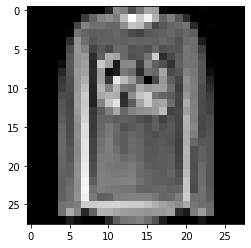

In [5]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [6]:
X_train.min(), X_train.max()

(0, 255)

In [7]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [8]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
# передача данных
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Задание 1.

In [11]:
%%time
results_num = pd.DataFrame()
n_nums = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []


for n_num in list(map(lambda x: 2**x, range(0,10))):
    
    n_nums.append(n_num)
    
    model = Sequential([
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(n_num, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_num['n_num'] = n_nums
results_num['train_loss'] = train_losses
results_num['test_loss'] = test_losses
results_num['train_metric'] = train_metrics
results_num['test_metric'] = test_metrics
results_num.sort_values(by='test_metric', ascending=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20        
Total params: 50,325
Trainable params: 50,325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 2.1671 - accuracy: 0.1762 - val_loss: 1.9452 - val_accuracy: 0.2254
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 1.9078 - accuracy: 0.2278 - val_loss: 1.8257 - val_accuracy: 0.2636
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 1.7963 - accuracy: 0.2708 -

,n_num,train_loss,test_loss,train_metric,test_metric
9,512,0.446581,0.479828,0.843183,0.8322
6,64,0.437196,0.471216,0.846733,0.8317
7,128,0.441587,0.475047,0.845833,0.8314
5,32,0.429071,0.467066,0.848600,0.8304
8,256,0.468642,0.502723,0.834067,0.8200
4,16,0.470868,0.506876,0.834700,0.8198
3,8,0.517783,0.553825,0.818867,0.8039
2,4,0.606888,0.638629,0.792100,0.7834
1,2,1.301346,1.315343,0.463717,0.4629
0,1,1.617183,1.620554,0.298933,0.2972


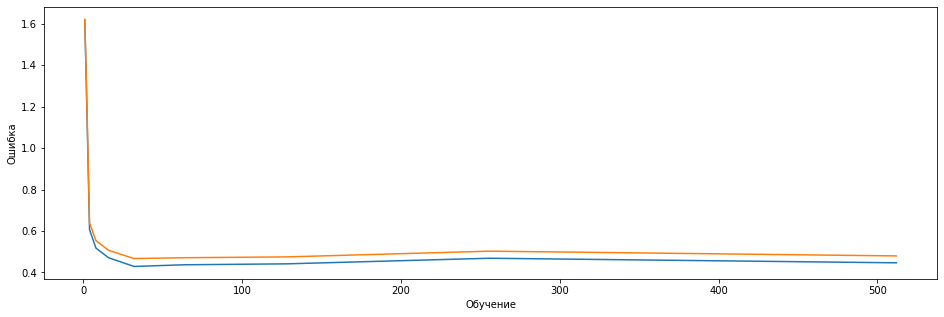

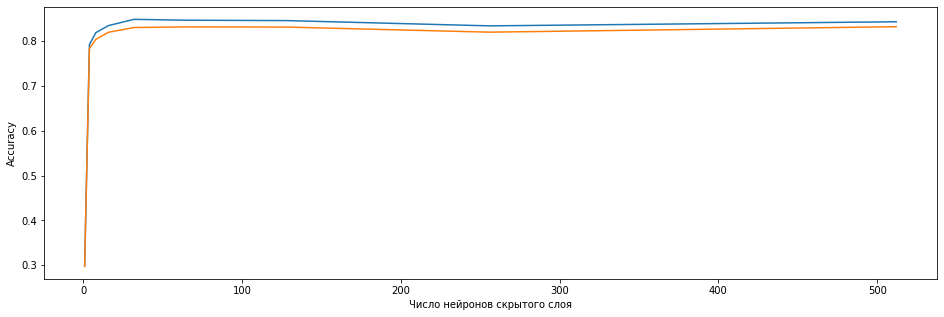

In [12]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'],results_num['train_loss'], label='train')
plt.plot(results_num['n_num'],results_num['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'],results_num['train_metric'], label='train')
plt.plot(results_num['n_num'],results_num['test_metric'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.show()

Лучшее качество на тесте получилось при 512 нейронах.
При увеличении числа нейронов скрытого слоя качество растёт до 16, затем скорость принимает примерно стабильное значение.

Проверим качество в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров)

In [13]:
%%time
results_layers = pd.DataFrame()
n_nums = [] # число нейронов скрытых слоев
n_layers = [] # число скрытых слоев
n_pars = [] # число тренируемых параметров
train_losses = [] # ошибка на тренировочной выборке
test_losses = [] # ошибка на тестовой выборке
train_metrics = [] # accuracy на тренировочной выборке
test_metrics = [] # accuracy на тестовой выборке

# Базовый размер возьмем для двухслойной сети с 128 нейронами, и будем равняться на него
k_dict = {2:128, 3:67, 5:45, 10:30}
for n in [2, 3, 5, 10]:
    
    k = k_dict[n]
    net_size = 64 * 785 + 65 * k + (n - 2) * (k + 1) * k + (k + 1) * 10
    n_nums.append(k) 
    n_pars.append(net_size)
    n_layers.append(n)
    
    model = Sequential()
    model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
    for i in range(n-1):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['n_par'] = n_pars
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 2s 1ms/step - loss: 1.3435 - accuracy: 0.5831 - val_loss: 0.6828 - val_accuracy: 0.7480
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.7920 - val_loss: 0.5720 - val_accuracy: 0.8034
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.5205 - accuracy: 0.820

,n_layer,n_num,n_par,train_loss,test_loss,train_metric,test_metric
1,3,67,59831,0.431802,0.467104,0.848800,0.8335
0,2,128,59850,0.459304,0.489256,0.840283,0.8304
2,5,45,59835,0.451216,0.484701,0.841133,0.8268
3,10,30,59940,0.511834,0.538974,0.819500,0.8064


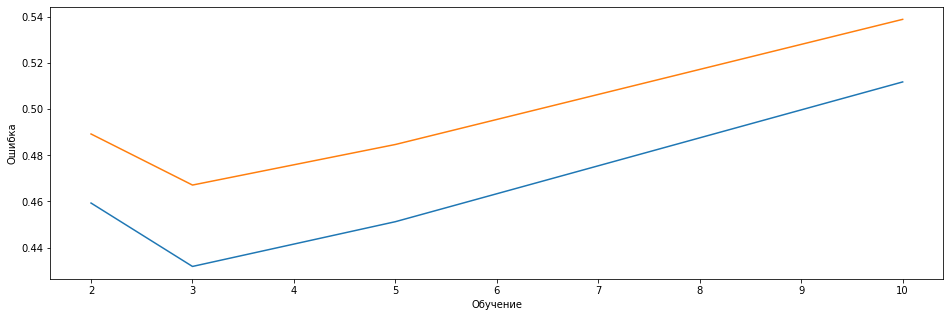

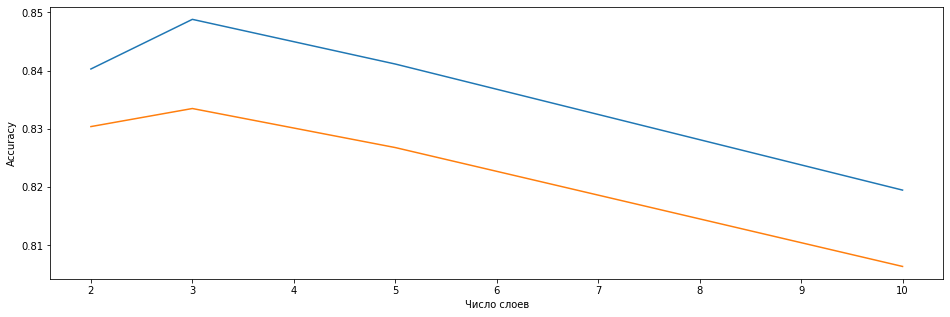

In [14]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.show()

Лучшее качество получилось на 3 слоях с 67 нейронами.
На 2, 3 и 5 слоях качество и ошибка примерно соразмерны, на 10 слоях качество гораздо хуже.

Задание 2.

Оптимизатор: SGD
Epoch 1/3
938/938 [==============================] - 2s 2ms/step - loss: 1.1275 - accuracy: 0.5995 - val_loss: 0.7151 - val_accuracy: 0.7421
Epoch 2/3
938/938 [==============================] - 1s 1ms/step - loss: 0.6026 - accuracy: 0.7823 - val_loss: 0.6254 - val_accuracy: 0.7681
Epoch 3/3
157/157 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.8017
Качество на тесте: 0.5413594245910645, 0.8016999959945679
Оптимизатор: RMSprop
Epoch 1/3
938/938 [==============================] - 2s 2ms/step - loss: 0.5721 - accuracy: 0.7900 - val_loss: 0.4810 - val_accuracy: 0.8271
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 0.4015 - accuracy: 0.8529 - val_loss: 0.4603 - val_accuracy: 0.8299
Epoch 3/3
157/157 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8441
Качество на тесте: 0.4333493709564209, 0.8440999984741211
Оптимизатор: Adam
Epoch 1/3
938/938 [==============================] - 2s 2ms/step -

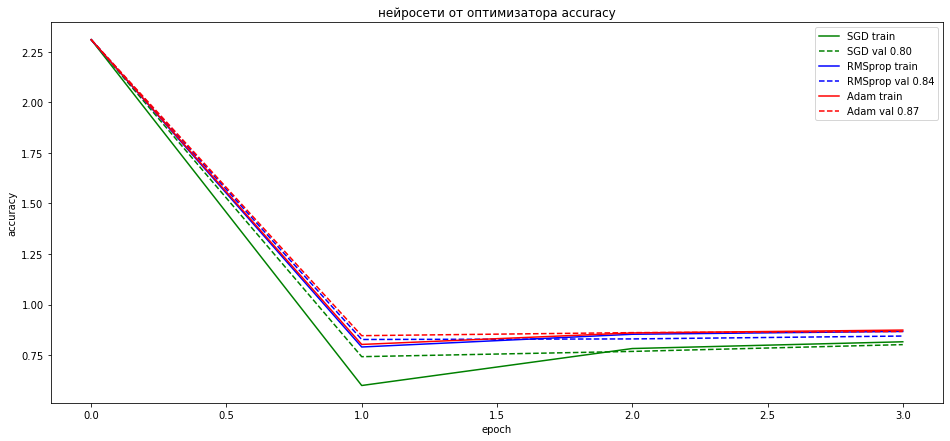

Wall time: 22.4 s


In [16]:
%%time

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(28 * 28,)),
    Dense(67, activation='relu'),
    Dense(67, activation='relu'),
    Dense(67, activation='relu'),
    Dense(67, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 3
batch_size = 64

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([SGD(),
                             RMSprop(),
                             Adam()]):
    print(f'Оптимизатор: {i_optim.get_config()["name"]}')
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(28 * 28,)),
        Dense(67, activation='relu'),
        Dense(67, activation='relu'),
        Dense(67, activation='relu'),
        Dense(67, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # вычисляем ошибку для modeli после обучения
    loss, metric = model_i.evaluate(X_test, y_test, batch_size=64)
    print(f'Качество на тесте: {loss}, {metric}')
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    
    plt.plot(epoch, ([h0_train[0]] + h.history['accuracy']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, ([h0_val[0]] + h.history['val_accuracy']),
             '--', c=colors[i],
             label=f'{model_i.optimizer.get_config()["name"]} val {metric:.2f}')

plt.legend()
plt.title('нейросети от оптимизатора accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Задание 3.

Итоговое качество на тестовой выборке получилось 0.8665 благодаря 
подбору оптимального количества скрытых слоев (3) и количества нейронов на них (67), а также выбору оптимизатора (Adam).

In [17]:
model_i = models['Adam']

In [18]:
model_i.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

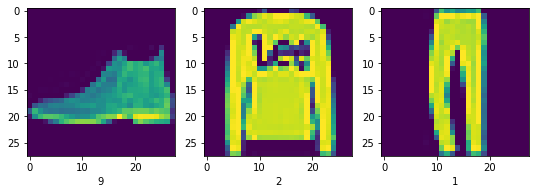

In [19]:
N = 3
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 3))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  #plt.xlabel(str(y_pred_class[i]))
  plt.xlabel(str(y_test_labels[i]))
plt.show()

Задание 4.

In [20]:
y_pred = model_i.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


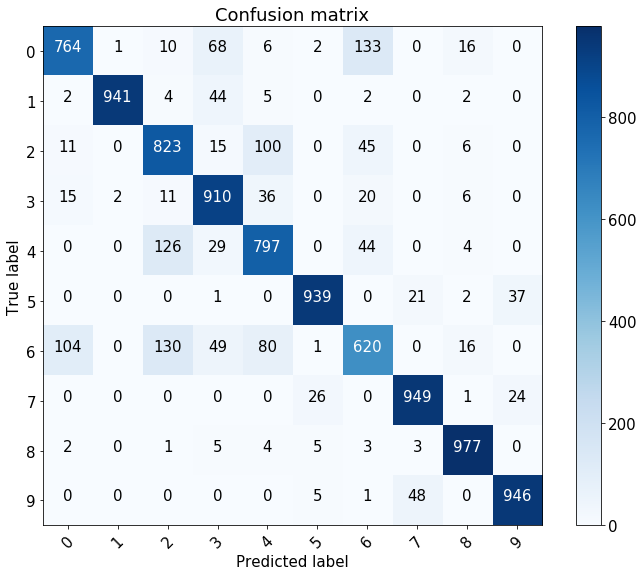

In [22]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

In [23]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [24]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

In [25]:
pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
8,8,0.977,0.948544
7,7,0.949,0.929481
9,9,0.946,0.939424
1,1,0.941,0.996822
5,5,0.939,0.960123
3,3,0.910,0.811775
2,2,0.823,0.744796
4,4,0.797,0.775292
0,0,0.764,0.850780
6,6,0.620,0.714286


In [26]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,precision,recall
1,1,0.941,0.996822
5,5,0.939,0.960123
8,8,0.977,0.948544
9,9,0.946,0.939424
7,7,0.949,0.929481
0,0,0.764,0.850780
3,3,0.910,0.811775
4,4,0.797,0.775292
2,2,0.823,0.744796
6,6,0.620,0.714286


In [27]:
d = {0: 'футболка/клубка',
     1: 'Брюки',
     2: 'Пуловер',
     3: 'Платье',
     4: 'Пальто',
     5: 'Сандал',
     6: 'Рубашка',
     7: 'Кроссовок',
     8: 'Сумка',
     9: 'Ботинок'}

Точнее всего модель предсказывает брюки, сандалии и сумки.
Хуже всего модель предсказывает рубашки.

In [28]:
ind = []
for i in range(10):
    ind.append(np.where(y_test_labels == i)[0][0])

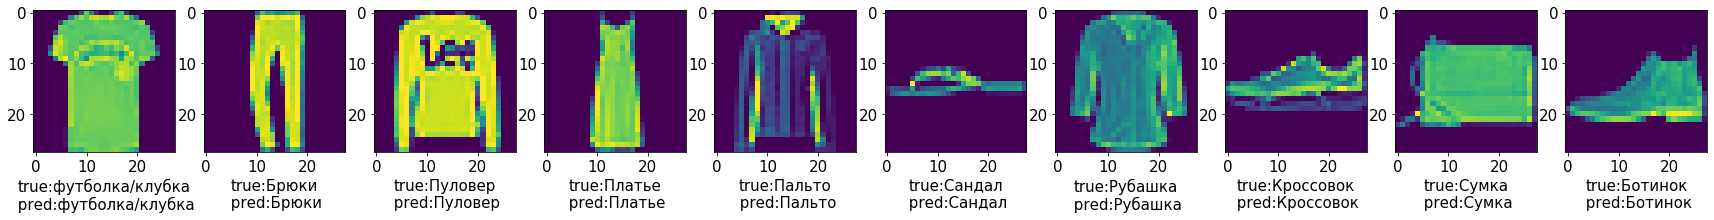

In [29]:
plt.figure(figsize=(3 * 10, 5))
k = 0
for i in ind:
  plt.subplot(1, 10, k+1)
  k+=1
  plt.imshow(X_test[i,:].reshape(28, 28))
  plt.xlabel('true:'+str(d[y_test_labels[i]])+'\n pred:'+str(d[y_pred_class[i]]))
plt.show()